## Categorical_Encoding

### Import Library

In [25]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler


In [26]:
df = pd.read_csv("clean data/clean_data_train.csv")


In [27]:
df = df.drop(columns=['Dia chi'])

In [28]:
frame = df
frame.head()

,Gia,Dien tich,Gia/m²,Huong dat,Loai hinh dat,Chieu ngang,Chieu dai,Quan
0,3.15,100.0,31.50,Tây Bắc,Đất nền dự án,5.0,20.0,Ngũ Hành Sơn
1,2.50,79.0,31.65,Đông Nam,Đất thổ cư,6.0,14.0,Sơn Trà
2,2.10,125.0,16.80,Đông Bắc,Đất thổ cư,4.2,31.0,Liên Chiểu
3,5.90,220.0,26.82,Tây Nam,Đất thổ cư,10.0,22.0,Cẩm Lệ
4,3.50,88.0,39.77,Đông Bắc,Đất thổ cư,5.0,17.5,Cẩm Lệ


In [29]:
# Cột mục tiêu
target_col = 'Gia'  # Thay thế bằng tên cột mục tiêu của bạn
# Các cột phân loại
categorical_cols = ['Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ mã hóa target
encoder = TargetEncoder(cols=categorical_cols)
# Mã hóa các cột phân loại bằng target encoding
encoded_data = encoder.fit_transform(frame[categorical_cols], frame[target_col])
# Tạo DataFrame từ dữ liệu đã mã hóa và đặt lại tên cột giống như cột gốc
encoded_df = pd.DataFrame(encoded_data, columns=categorical_cols)
# Kết hợp dữ liệu đã mã hóa vào DataFrame gốc mà không thay đổi tên cột
frame = frame.drop(categorical_cols, axis=1).reset_index(drop=True)
frame = pd.concat([frame, encoded_df], axis=1)

continuous_cols = ['Dien tich', 'Gia/m²', 'Chieu ngang', 'Chieu dai', 'Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ chuẩn hóa dữ liệu
scaler = StandardScaler()
# Chuẩn hóa các cột liên tục
frame[continuous_cols] = scaler.fit_transform(frame[continuous_cols])
# Hiển thị 5 hàng đầu tiên của dữ liệu đã xử lý
frame.head()


,Gia,Dien tich,Gia/m²,Chieu ngang,Chieu dai,Huong dat,Loai hinh dat,Quan
0,3.15,-0.456774,-0.195102,-0.519699,-0.038198,-0.678012,-1.041156,0.011057
1,2.50,-0.842025,-0.189120,-0.082630,-1.643005,-0.408889,0.960471,2.672244
2,2.10,0.001859,-0.781291,-0.869355,2.903947,1.210937,0.960471,-0.601389
3,5.90,1.744663,-0.381725,1.665649,0.496737,1.392671,0.960471,0.265825
4,3.50,-0.676918,0.134679,-0.519699,-0.706867,1.210937,0.960471,0.265825


In [30]:

frame.info()
frame.to_csv('clean data\\clean_data_train_encoded.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gia            1290 non-null   float64
 1   Dien tich      1290 non-null   float64
 2   Gia/m²         1290 non-null   float64
 3   Chieu ngang    1290 non-null   float64
 4   Chieu dai      1290 non-null   float64
 5   Huong dat      1290 non-null   float64
 6   Loai hinh dat  1290 non-null   float64
 7   Quan           1290 non-null   float64
dtypes: float64(8)
memory usage: 80.8 KB


## GradientBoostingRegression

### Train Mo Hinh

In [31]:
# Import các thư viện cần thiết
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)
# Khởi tạo mô hình Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=365)
# Huấn luyện mô hình trên tập huấn luyện
reg.fit(X_train, y_train)
# Bước 4: Dự đoán trên tập kiểm tra
y_pred = reg.predict(X_test)

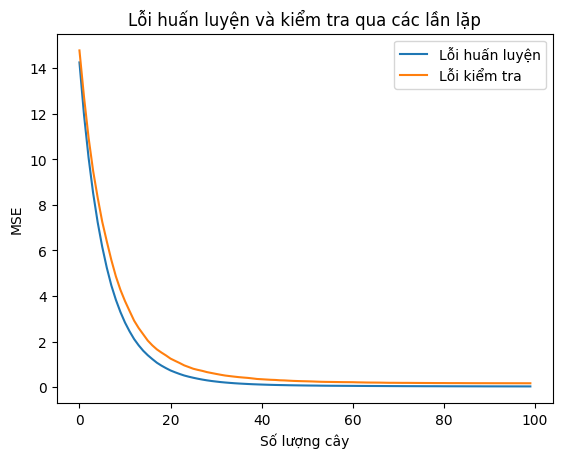

In [32]:
# Lấy thông tin về lỗi huấn luyện trong quá trình huấn luyện
train_loss = reg.train_score_
# Tính toán lỗi kiểm tra (test_loss) cho mỗi giai đoạn của quá trình huấn luyện
test_loss = []
for y_pred_stage in reg.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred_stage)
    test_loss.append(mse)
# Vẽ biểu đồ lỗi huấn luyện và kiểm tra qua các lần lặp
plt.figure()
plt.plot(train_loss, label='Lỗi huấn luyện')
plt.plot(test_loss, label='Lỗi kiểm tra')
plt.xlabel('Số lượng cây')
plt.ylabel('MSE')
plt.title('Lỗi huấn luyện và kiểm tra qua các lần lặp')
plt.legend()
plt.show()



- Lỗi của tập kiểm tra cao hơn tập huấn luyện trên mọi giá trị số lượng cây

In [33]:
# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print(f"\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")


So sánh:
Train MAE: 0.1072 vs Test MAE: 0.1952
Train MSE: 0.0334 vs Test MSE: 0.1717
Train RMSE: 0.1826 vs Test RMSE: 0.4143
Train R^2: 0.9980 vs Test R^2: 0.9899


- MAE của tập huấn luyện là 0.1072, thấp hơn đáng kể so với MAE của tập kiểm tra là 0.1952
- MSE của tập huấn luyện là 0.0334, rất thấp so với MSE của tập kiểm tra là 0.1717. 
- Giá trị R^2 của tập huấn luyện là 0.9980, Trong khi đó, R^2 của tập kiểm tra là 0.9899, rất gần với giá trị hoàn hảo là 1. 

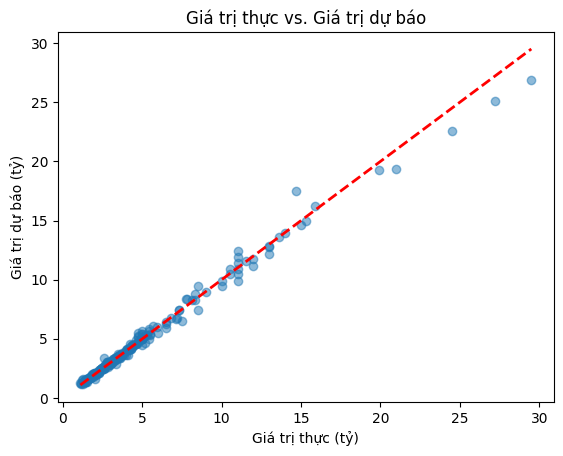

In [35]:
# Biểu đồ phân tán giữa giá trị thực và giá trị dự báo
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.xlabel('Giá trị thực (tỷ)')
plt.ylabel('Giá trị dự báo (tỷ)')
plt.title('Giá trị thực vs. Giá trị dự báo')
# Vẽ đường chéo (45 độ) trên biểu đồ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.show()


- Giá trị dự đoán tập trung quanh đường chéo 45 độ. Giá càng tăng khả năng rời xa đường chéo càng lớn

In [36]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}
A = pd.DataFrame(data)
# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)
# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
878,1.479976,1.48,0.0016
768,1.349840,1.35,0.0119
344,2.250515,2.25,0.0229
655,2.451150,2.45,0.0470
641,3.497870,3.50,0.0609
...,...,...,...
225,17.520328,14.70,19.1859
368,1.598508,2.00,20.0746
846,1.504245,1.20,25.3538
892,1.588743,1.25,27.0994


- Sai lệch giao động từ 0.0016 đến 29.9044

In [37]:
B['% sai lech'].describe()

count    258.000000
mean       3.874496
std        4.501251
min        0.001600
25%        0.860475
50%        2.145600
75%        5.614975
max       29.904400
Name: % sai lech, dtype: float64

- Có 258 mẫu, giá trị trung bình 3.874496
- Độ lệch chuẩn của dữ liệu là 4.501251. Độ lệch chuẩn này khá lớn so với giá trị trung bình, cho thấy rằng dữ liệu có sự phân tán cao và phân phối rộng.
- 75% giá trị sai số dưới mức 5.614975

In [38]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

0.41434273919610326

- Sai lệch giá trung bình khoảng 414 triệu

### Kiem tra mo hinh bang ky thuat multiple test sets

In [48]:
data = frame  

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)
num_splits = 5
X_test_splits = np.array_split(X_test, num_splits)
y_test_splits = np.array_split(y_test, num_splits)
reg = GradientBoostingRegressor(random_state=365)
reg.fit(X_train, y_train)
# Đánh giá mô hình trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = round(mean_absolute_error(y_train, y_train_pred), 4)
train_mse = round(mean_squared_error(y_train, y_train_pred), 4)
train_rmse = round(np.sqrt(train_mse), 4)
train_r2 = round(r2_score(y_train, y_train_pred), 4)

print(f'Train          MAE: {train_mae:<8} MSE: {train_mse:<8} RMSE: {train_rmse:<8} R^2: {train_r2:<8}')
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
for i in range(num_splits):
    X_test_part = X_test_splits[i]
    y_test_part = y_test_splits[i]
    y_pred_part = reg.predict(X_test_part)
    mae = round(mean_absolute_error(y_test_part, y_pred_part), 4)
    mse = round(mean_squared_error(y_test_part, y_pred_part), 4)
    rmse = round(np.sqrt(mse), 4)
    r2 = round(r2_score(y_test_part, y_pred_part), 4)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    print(f'Test split {(i+1):<2}: MAE: {mae:<8} MSE: {mse:<8} RMSE: {rmse:<8} R²: {r2:<8}')
mean_mae = round(np.mean(mae_list), 4)
mean_mse = round(np.mean(mse_list), 4)
mean_rmse = round(np.mean(rmse_list), 4)
mean_r2 = round(np.mean(r2_list), 4)
print(f'\nAverage metrics across all test splits:')
print(f'Mean Absolute Error (MAE): {mean_mae}')
print(f'Mean Squared Error (MSE): {mean_mse}')
print(f'Mean Root Mean Squared Error (RMSE): {mean_rmse}')
print(f'Mean R² Score: {mean_r2:}')


C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Train          MAE: 0.1183   MSE: 0.0442   RMSE: 0.2102   R^2: 0.9975  
Test split 1 : MAE: 0.1879   MSE: 0.1908   RMSE: 0.4368   R²: 0.9919  
Test split 2 : MAE: 0.3002   MSE: 0.3295   RMSE: 0.574    R²: 0.9853  
Test split 3 : MAE: 0.1915   MSE: 0.1195   RMSE: 0.3457   R²: 0.9859  
Test split 4 : MAE: 0.1823   MSE: 0.0998   RMSE: 0.3159   R²: 0.9878  
Test split 5 : MAE: 0.2399   MSE: 0.3232   RMSE: 0.5685   R²: 0.9707  

Average metrics across all test splits:
Mean Absolute Error (MAE): 0.2204
Mean Squared Error (MSE): 0.2126
Mean Root Mean Squared Error (RMSE): 0.4482
Mean R² Score: 0.9843


- Chỉ số R^2 tốt giao động trên 97%
- MAE, MSE và RMSE trên các phần test đều có sự biến thiên đáng kể. Điều này cho thấy mô hình có thể đã học quá kỹ các đặc trưng của tập huấn luyện. làm giảm hiệu suất khi dự đoán trên dữ liệu mới.

### Kiem tra mo hinh bang ky thuat cross-validation

In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = frame  
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
reg = GradientBoostingRegressor(random_state=365)

kf = KFold(n_splits=5, shuffle=True, random_state=365)
cv_mae = []
cv_mse = []
cv_rmse = []
cv_r2 = []
 
fold = 1
for train_index, test_index in kf.split(X):
    X_cv_train, X_cv_test = X.iloc[train_index], X.iloc[test_index]
    y_cv_train, y_cv_test = y.iloc[train_index], y.iloc[test_index]
 
    reg.fit(X_cv_train, y_cv_train)
    y_cv_pred = reg.predict(X_cv_test)
    # Đánh giá mô hình trên tập huấn luyện
 
    fold_mae = mean_absolute_error(y_cv_test, y_cv_pred)
    fold_mse = mean_squared_error(y_cv_test, y_cv_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred))
    fold_r2 = r2_score(y_cv_test, y_cv_pred)
 
    cv_mae.append(fold_mae)
    cv_mse.append(fold_mse)
    cv_rmse.append(fold_rmse)
    cv_r2.append(fold_r2)
 
    # In ra các chỉ số của mỗi fold
    print(f"Fold {fold}: MAE: {fold_mae:.4f}, MSE: {fold_mse:.4f}, RMSE: {fold_rmse:.4f}, R^2: {fold_r2:.4f}")
    fold += 1
 
# In ra các chỉ số trung bình của cross-validation
print(f"\nCross-Validation Mean MAE: {np.mean(cv_mae):.4f}")
print(f"Cross-Validation Mean MSE: {np.mean(cv_mse):.4f}")
print(f"Cross-Validation Mean RMSE: {np.mean(cv_rmse):.4f}")
print(f"Cross-Validation Mean R^2: {np.mean(cv_r2):.4f}")

Fold 1: MAE: 0.1958, MSE: 0.1752, RMSE: 0.4185, R^2: 0.9897
Fold 2: MAE: 0.1929, MSE: 0.1477, RMSE: 0.3843, R^2: 0.9853
Fold 3: MAE: 0.2567, MSE: 0.3373, RMSE: 0.5808, R^2: 0.9840
Fold 4: MAE: 0.2234, MSE: 0.2774, RMSE: 0.5267, R^2: 0.9824
Fold 5: MAE: 0.2291, MSE: 0.2223, RMSE: 0.4715, R^2: 0.9894

Cross-Validation Mean MAE: 0.2196
Cross-Validation Mean MSE: 0.2320
Cross-Validation Mean RMSE: 0.4764
Cross-Validation Mean R^2: 0.9862


### Hieu chinh mo hinh

In [15]:
data = frame

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Tạo danh sách các giá trị `random_state` để thử nghiệm
random_states = list(range(0,3000))  # Danh sách từ 0 đến 2000 (bao gồm cả 2000)

# Khởi tạo biến để lưu trữ kết quả tốt nhất
best_mae = float('inf')  # Giá trị MAE tốt nhất (ban đầu là vô cùng)
best_random_state = None  # Giá trị `random_state` tốt nhất

# Lặp qua các giá trị `random_state` để tìm giá trị tốt nhất
for random_state in random_states:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Khởi tạo và huấn luyện mô hình Gradient Boosting Regressor
    reg = GradientBoostingRegressor(random_state=random_state)
    reg.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = reg.predict(X_test)
    
    # Tính toán chỉ số MAE trên tập kiểm tra
    mae = mean_absolute_error(y_test, y_pred)
    if mae < best_mae:
        best_mae = mae
        best_random_state = random_state
    
    # In kết quả của giá trị `random_state` hiện tại
    print(f"random_state = {random_state}: MAE = {mae:.4f}")

# In ra giá trị `random_state` tốt nhất và MAE tương ứng
print(f"\nGiá trị random_state tốt nhất: {best_random_state}")
print(f"MAE tốt nhất: {best_mae:.4f}")


random_state = 0: MAE = 0.1820
random_state = 1: MAE = 0.1940
random_state = 2: MAE = 0.2385
random_state = 3: MAE = 0.2550
random_state = 4: MAE = 0.1917
random_state = 5: MAE = 0.2063
random_state = 6: MAE = 0.2202
random_state = 7: MAE = 0.1811
random_state = 8: MAE = 0.2031
random_state = 9: MAE = 0.2170
random_state = 10: MAE = 0.2919
random_state = 11: MAE = 0.1746
random_state = 12: MAE = 0.1912
random_state = 13: MAE = 0.2470
random_state = 14: MAE = 0.2357
random_state = 15: MAE = 0.2202
random_state = 16: MAE = 0.2111
random_state = 17: MAE = 0.2508
random_state = 18: MAE = 0.1866
random_state = 19: MAE = 0.1919
random_state = 20: MAE = 0.2108
random_state = 21: MAE = 0.3325
random_state = 22: MAE = 0.2264
random_state = 23: MAE = 0.2594
random_state = 24: MAE = 0.2115
random_state = 25: MAE = 0.1967
random_state = 26: MAE = 0.1971
random_state = 27: MAE = 0.2103
random_state = 28: MAE = 0.2129
random_state = 29: MAE = 0.2442
random_state = 30: MAE = 0.1790
random_state = 31:

In [33]:
# Import các thư viện cần thiết
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả định `frame` là một DataFrame chứa dữ liệu đã chuẩn hóa.
data = frame

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2345)

# Khởi tạo mô hình Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=2345)

#Thiết lập không gian siêu tham số
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'validation_fraction': [0.1, 0.15, 0.2],
    'n_iter_no_change': [5, 10, 20],
    'tol': [1e-4, 1e-3, 1e-2]
}


# Sử dụng GridSearchCV để tìm kiếm tối ưu hóa siêu tham số
grid_search = GridSearchCV(
    reg,
    param_grid,
    cv=5,  # Số lượng fold trong cross-validation
    scoring='neg_mean_absolute_error',  # Chỉ số đánh giá (MAE)
    verbose=1,  # Hiển thị tiến trình
    n_jobs=-1  # Sử dụng nhiều CPU để tăng tốc độ
)

# Thực hiện tìm kiếm
grid_search.fit(X_train, y_train)

# Lấy bộ siêu tham số tốt nhất

best_params = grid_search.best_params_
print("Bộ siêu tham số tốt nhất:", best_params)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = best_model.predict(X_test)

# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# In kết quả ra màn hình
print(f"\nKết quả đánh giá trên tập kiểm tra:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Bộ siêu tham số tốt nhất: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'n_iter_no_change': 20, 'tol': 0.0001, 'validation_fraction': 0.2}

Kết quả đánh giá trên tập kiểm tra:
MAE: 0.1300
MSE: 0.0874
RMSE: 0.2956
R^2: 0.9921


### Test sau hieu chinh

In [50]:
data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Bước 2: Chia dữ liệu thành tập huấn luyện và kiểm tra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2345)
reg_test = GradientBoostingRegressor(
    random_state=2345,
    n_estimators=1000,  
    learning_rate=0.05,  
    max_depth=4, 
    validation_fraction=0.2,  
    n_iter_no_change=20,  
    tol=0.0001  
)

reg_test.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = reg_test.predict(X_test)




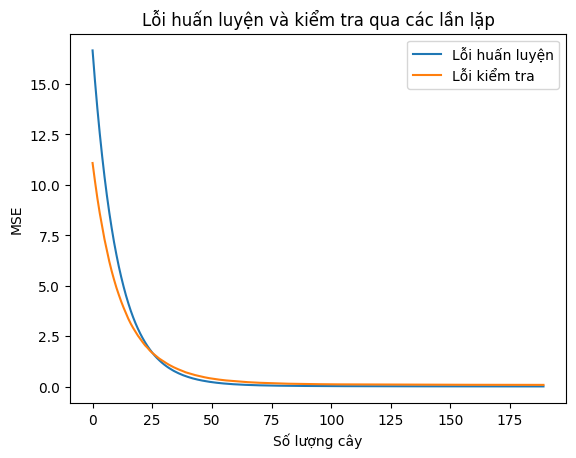

In [51]:
# Lấy thông tin về lỗi huấn luyện trong quá trình huấn luyện
train_loss = reg_test.train_score_

# Tính toán lỗi kiểm tra (test_loss) cho mỗi giai đoạn của quá trình huấn luyện
test_loss = []
for y_pred_stage in reg_test.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred_stage)
    test_loss.append(mse)

# Vẽ biểu đồ lỗi huấn luyện và kiểm tra qua các lần lặp
plt.figure()
plt.plot(train_loss, label='Lỗi huấn luyện')
plt.plot(test_loss, label='Lỗi kiểm tra')
plt.xlabel('Số lượng cây')
plt.ylabel('MSE')
plt.title('Lỗi huấn luyện và kiểm tra qua các lần lặp')
plt.legend()
plt.show()



- Lỗi của tập kiểm tra ban thấp hơn tập huấn luyện trước giá trị số lượng cây khoảng 20 
- Sau giá trị số lượng cây 20 lỗi của tập kiểm tra cao hơn tập huấn luyện

In [52]:
# Tính toán các chỉ số MAE, MSE, RMSE, R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Thực hiện cross-validation MAE với 5-fold cross-validation
cv_mae = np.abs(cross_val_score(reg_test, X, y, cv=5, scoring='neg_mean_absolute_error'))


# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg_test.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# In kết quả ra màn hình với 4 chữ số thập phân
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print(f"\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")

# Bạn cũng có thể in ra số vòng lặp thực tế trước khi dừng sớm nếu quá trình huấn luyện bị dừng sớm
print(f"\nSố vòng lặp trước khi dừng sớm: {reg_test.n_estimators_}")

Train MAE: 0.0954
Train MSE: 0.1097
Train RMSE: 0.3312
Train R^2: 0.9940

So sánh:
Train MAE: 0.0954 vs Test MAE: 0.1300
Train MSE: 0.1097 vs Test MSE: 0.0874
Train RMSE: 0.3312 vs Test RMSE: 0.2956
Train R^2: 0.9940 vs Test R^2: 0.9921

Số vòng lặp trước khi dừng sớm: 190


- MAE của tập huấn luyện là 0.0944, thấp hơn so với MAE của tập kiểm tra là 0.1500 và MAE của kiểm định chéo là 0.2203. 
- Điều này cho thấy rằng mô hình hoạt động tốt trên tập huấn luyện nhưng kém hơn trên tập kiểm tra và kiểm định chéo.
- MSE của tập huấn luyện là 0.0407, thấp hơn so với MSE của tập kiểm tra là 0.0719.
- Giá trị R^2 của tập huấn luyện là 0.9977, rất gần với 1, R^2 của tập kiểm tra là 0.9944, vẫn là một giá trị cao, nhưng hiệu suất thấp hơn một chút so với tập huấn luyện.

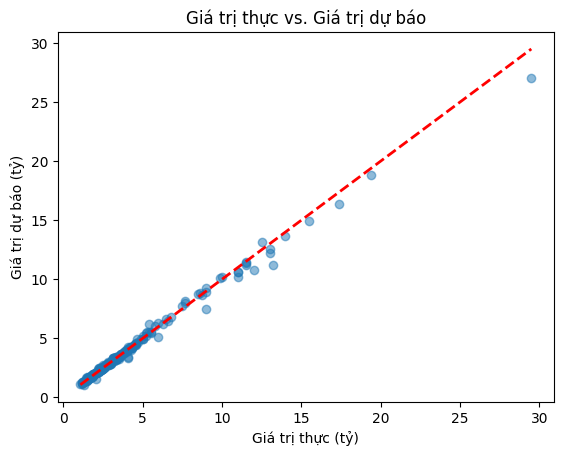

In [53]:
# Biểu đồ phân tán giữa giá trị thực và giá trị dự báo
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.xlabel('Giá trị thực (tỷ)')
plt.ylabel('Giá trị dự báo (tỷ)')
plt.title('Giá trị thực vs. Giá trị dự báo')

# Vẽ đường chéo (45 độ) trên biểu đồ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.show()

- Giá trị dự đoán tập trung quanh đường chéo 45 độ. Giá càng tăng khả năng rời xa đường chéo càng cao, nhưng đã thấp hơn so với mô hình trước khi hiệu chỉnh

In [54]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100

# Chuyển đổi thành DataFrame
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}

A = pd.DataFrame(data)

# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)

# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])

# Hiển thị DataFrame đã sắp xếp
B

,Gia du doan,Gia thuc,% sai lech
90,3.650806,3.65,0.0221
1146,11.504162,11.50,0.0362
423,1.290542,1.29,0.0420
173,6.803623,6.80,0.0533
479,2.797891,2.80,0.0753
...,...,...,...
518,3.447207,4.10,15.9218
727,7.511253,9.00,16.5416
151,3.356647,4.08,17.7292
851,1.058895,1.30,18.5466


- Sai lệch giao động từ 0.0189 đến 29.6814 giảm so với trước khi hiệu chỉnh

In [55]:
B['% sai lech'].describe()

count    258.000000
mean       3.007447
std        3.592849
min        0.022100
25%        0.726525
50%        1.799400
75%        3.862400
max       23.197200
Name: % sai lech, dtype: float64

- Số lượng mẫu trong tập dữ liệu là 258
- Độ lệch chuẩn là 4.195034, khá lớn so với giá trị trung bình. 
- Điều này cho thấy dữ liệu có sự phân tán cao, và có thể có một số giá trị lệch xa khỏi giá trị trung bình.
- 75% giá trị sai số dưới mức 4.527375, giảm so với trước khi hiệu chỉnh

In [56]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

0.19287102698237835

- Sai lệch giá trung bình khoảng 268 triệu giảm so với 430 triệu trước khi hiệu chỉnh

Sau khi hiệu chỉnh, mô hình hoạt động tốt hơn. Dự đoán giá giảm sai lệch, chính xác hơn

## Test mô hình

In [10]:
df = pd.read_csv("clean data/clean_data_test.csv")
df = df.drop(columns=['Dia chi'])
frame = df
frame.head()


,Gia,Dien tich,Gia/m²,Huong dat,Loai hinh dat,Chieu ngang,Chieu dai,Quan
0,6.80,180.0,37.78,Đông Bắc,Đất nền dự án,9.0,20.00,Liên Chiểu
1,13.50,98.0,137.76,Đông Nam,Đất thổ cư,5.0,19.60,Ngũ Hành Sơn
2,6.00,100.0,60.00,Bắc,Đất thổ cư,5.0,20.00,Sơn Trà
3,3.35,75.0,44.67,NaN,Đất thổ cư,5.0,15.00,Liên Chiểu
4,3.90,97.2,40.12,Tây Bắc,Đất thổ cư,5.0,19.44,Thanh Khê


In [11]:
# Cột mục tiêu
target_col = 'Gia'  # Thay thế bằng tên cột mục tiêu của bạn
# Các cột phân loại
categorical_cols = ['Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ mã hóa target
encoder = TargetEncoder(cols=categorical_cols)
# Mã hóa các cột phân loại bằng target encoding
encoded_data = encoder.fit_transform(frame[categorical_cols], frame[target_col])
# Tạo DataFrame từ dữ liệu đã mã hóa và đặt lại tên cột giống như cột gốc
encoded_df = pd.DataFrame(encoded_data, columns=categorical_cols)
# Kết hợp dữ liệu đã mã hóa vào DataFrame gốc mà không thay đổi tên cột
frame = frame.drop(categorical_cols, axis=1).reset_index(drop=True)
frame = pd.concat([frame, encoded_df], axis=1)

continuous_cols = ['Dien tich', 'Gia/m²', 'Chieu ngang', 'Chieu dai', 'Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ chuẩn hóa dữ liệu
scaler = StandardScaler()
# Chuẩn hóa các cột liên tục
frame[continuous_cols] = scaler.fit_transform(frame[continuous_cols])
# Hiển thị 5 hàng đầu tiên của dữ liệu đã xử lý
frame.head()



,Gia,Dien tich,Gia/m²,Chieu ngang,Chieu dai,Huong dat,Loai hinh dat,Quan
0,6.80,1.186311,-0.025090,1.540727,0.027769,1.175945,-2.090884,-0.879677
1,13.50,-0.394455,4.335393,-0.464070,-0.070398,-0.426072,0.478267,0.155481
2,6.00,-0.355900,0.944003,-0.464070,0.027769,-0.770089,0.478267,1.688821
3,3.35,-0.837841,0.275408,-0.464070,-1.199317,-0.843191,0.478267,-0.879677
4,3.90,-0.409878,0.076966,-0.464070,-0.109665,-0.264323,0.478267,0.150637


In [12]:
frame.info()
frame.to_csv('clean data\\clean_data_test_encoded.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gia            419 non-null    float64
 1   Dien tich      419 non-null    float64
 2   Gia/m²         419 non-null    float64
 3   Chieu ngang    419 non-null    float64
 4   Chieu dai      419 non-null    float64
 5   Huong dat      419 non-null    float64
 6   Loai hinh dat  419 non-null    float64
 7   Quan           419 non-null    float64
dtypes: float64(8)
memory usage: 26.3 KB


In [13]:
data = frame
# Xác định đặc trưng (features) và nhãn (target)
X_test = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y_test = data['Gia']  # Biến mục tiêu (giá đất)

y_pred = reg_test.predict(X_test)


In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# In kết quả ra màn hình với 4 chữ số thập phân
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

MAE: 0.3478
MSE: 0.3917
RMSE: 0.6259
R^2: 0.9660


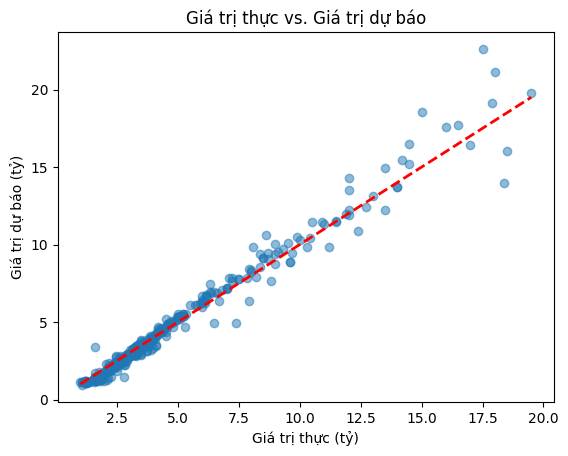

In [15]:
# Biểu đồ phân tán giữa giá trị thực và giá trị dự báo
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.xlabel('Giá trị thực (tỷ)')
plt.ylabel('Giá trị dự báo (tỷ)')
plt.title('Giá trị thực vs. Giá trị dự báo')

# Vẽ đường chéo (45 độ) trên biểu đồ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.show()

In [16]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100

# Chuyển đổi thành DataFrame
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}

A = pd.DataFrame(data)

# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)

# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])

# Hiển thị DataFrame đã sắp xếp
B

,Gia du doan,Gia thuc,% sai lech
18,11.497606,11.50,0.0208
181,7.847283,7.85,0.0346
35,10.404360,10.40,0.0419
43,3.402039,3.40,0.0600
9,2.948058,2.95,0.0658
...,...,...,...
167,1.436509,2.25,36.1552
106,1.188117,1.95,39.0709
16,1.240495,2.09,40.6462
245,1.434340,2.80,48.7736


In [17]:
B['% sai lech'].describe()

count    419.000000
mean       8.454273
std        9.045015
min        0.020800
25%        3.028600
50%        6.233300
75%       11.340650
max      114.305600
Name: % sai lech, dtype: float64

In [20]:
avgg = (sum((reg_test.predict(X_test) - y_test)**2) / len(y_test))**0.5
print(f'Giá trị sai lệch trung bình: {avgg}')


Giá trị sai lệch trung bình: 0.6258750122433303
